<a href="https://colab.research.google.com/github/AlexFMo/Electrochemistry/blob/main/Electrochemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electrochemistry Lab Results**

### **Content of the Notebook**
* Introduction
* Cycling test
* Hybrid Pulse Power Characterization test (HPPC) 


### **Introduction**

This notebook presents results obtained from a lab exercise related to Li-ion batteries performed in the master's course [Electrochemical Energy Devices](https://www.kth.se/student/kurser/kurs/KE2300?l=en) at KTH Royal Institute of Technology

**Required libraries**

In [ ]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt

### **Cycling Test**

The first task consisted in cycling a commercial Li-ion cell 2.5 – 3.6 V. The experiments were run using a computer-controlled cycling equipment. 
The rated capacity of the cell is 1.1 Ah as specified by the manufacturer. The cell was fully discharged at the beginning of the lab. 

1. Charging

Charge the cell with a 1C constant current (galvanostatic) to 3.6 V. When the cell reaches this potential, switch to a constant potential (potentiostatic) of 3.6 V. Allow the cell to stay at open circuit for 15
minutes.

2. Discharging

Discharge the cell galvanostatically with a 1C current to 2.5 V. When the cell
reaches this potential, switch to open circuit conditions for 15 minutes.


In [63]:
#Upload measurements file from local files
uploaded = files.upload()

Saving coin_cell.txt to coin_cell (1).txt


In [64]:
CC = pd.read_csv(io.BytesIO(uploaded['coin_cell.txt']))
CC = pd.read_csv('coin_cell.txt', delimiter = '\t')

In [65]:
CC

,Ewe/V,<I>/mA,time/s
0,0.138871,0.000000,0.000200
1,0.139024,0.000000,1.000200
2,0.139177,0.000000,2.000200
3,0.139291,0.000000,3.000200
4,0.139215,0.000000,4.000200
...,...,...,...
7146,2.557534,-1.801736,31667.141963
7147,2.542968,-1.801736,31669.141963
7148,2.527695,-1.801736,31671.141963
7149,2.511525,-1.801737,31673.141963


In [222]:
#Assign variables
V1 = CC['Ewe/V']
I1 = CC['<I>/mA']
t1 = CC['time/s']

In [216]:
#Capacity
#Q = I*t
#Q = I(mA)*t(s)/3600 [mAh]
Q = I1 * t1 / 3600

In [217]:
#Charge at C-rate of C/5
V_C5 = V1[0:2615]
Q_C5 = Q[0:2615]

#Disharge at C-rate of C/5
V_discC5 = V1[2623:4930]
t_discC5 = t1[2623:4930] - t1[2623]
Q_discC5 = -I1 * t_discC5 / 3600
Q_discC5 = Q_discC5[2623:4930]        

In [218]:
#Charge at C-rate of 1C

V_1C = V1[4938:6050]
t_1C = t1[4938:6050] - t1[4938]
Q_1C = I1 * t_1C / 3600
Q_1C = Q_1C[4938:6050]

#Discharge at C-rate of 1C
V_disc1C = V1[6058:7150]
t_disc1C = t1[6058:7150] - t1[6058]
Q_disc1C = -I1 * t_disc1C / 3600
Q_disc1C = Q_disc1C[6058:7150]


Charge curves

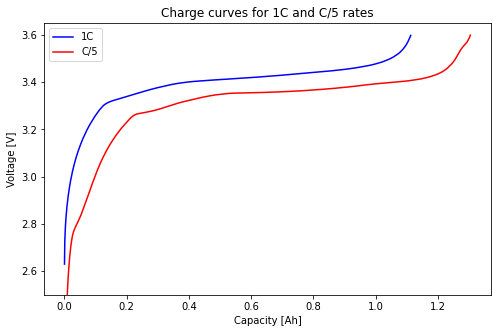

In [219]:
#Create plot
fig1 = plt.figure(figsize=[8, 5]) 
#Create axis
ax = plt.axes()

#Plot 1C
ax.plot(Q_1C, V_1C, color='b', label='1C')
#Plot C/5
ax.plot(Q_C5, V_C5, color='r', label='C/5')

#Set labels
ax.set_xlabel('Capacity [Ah]')
ax.set_ylabel('Voltage [V]')

#Set axis limits
ax.set_ylim([2.5, 3.65])

#Set title and Legend
ax.set_title('Charge curves for 1C and C/5 rates')
ax.legend(loc=0)

plt.show()


Discharge curves

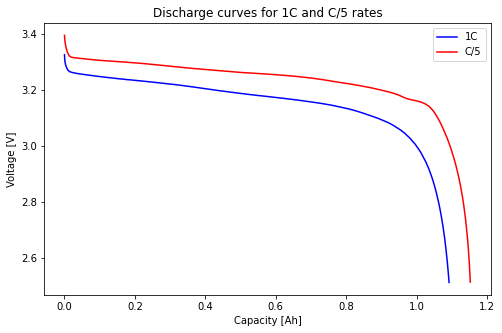

In [220]:
#Create plot
fig2 = plt.figure(figsize=[8, 5]) 
#Create axis
ax = plt.axes()

#Plot 1C
ax.plot(Q_disc1C, V_disc1C, color='b', label='1C')
#Plot C/5
ax.plot(Q_discC5, V_discC5, color='r', label='C/5')

#Set labels
ax.set_xlabel('Capacity [Ah]')
ax.set_ylabel('Voltage [V]')
#Set title and Legend
ax.set_title('Discharge curves for 1C and C/5 rates')
ax.legend(loc=0)

plt.show()

### **Hybrid Pulse Power Characterization test (HPPC) of a 18650 commercial cell**

**Experimental Set-up**

The commercial LiFePO4 / graphite cell was connected to a computer controlled cycling equipment. The battery was cycled with the following steps:
 
1.     Charging the battery with 1C galvanostatic current to 3.6 V.
2.     Switching to potentiostatic conditions at 3.6 V for 15 minutes.
3.     Discharging the cell with 1C galvanostatic current to 2.5 V.
4.     Switching to potentiostatic conditions at 2.5 V for 15 minutes


In [87]:
#Upload measurements file from local files
uploaded = files.upload()

Saving HPPC_test-4.txt to HPPC_test-4 (1).txt


In [88]:
HPPC = pd.read_csv(io.BytesIO(uploaded['HPPC_test-4.txt']))
HPPC = pd.read_csv('HPPC_test-4.txt', delimiter = '\t')

In [90]:
HPPC

,Time (s),Voltage(V),Current(A)
0,1,3.1411,1.1008
1,2,3.1594,1.1008
2,3,3.1702,1.1008
3,4,3.1783,1.1008
4,5,3.1848,1.1008
...,...,...,...
27028,27029,3.0143,0.0000
27029,27030,3.0143,0.0000
27030,27031,3.0146,0.0000
27031,27032,3.0146,0.0000


In [221]:
#Assign variables
V = HPPC['Voltage(V)']
I = HPPC['Current(A)']
t = HPPC['Time (s)']

**Plot results**

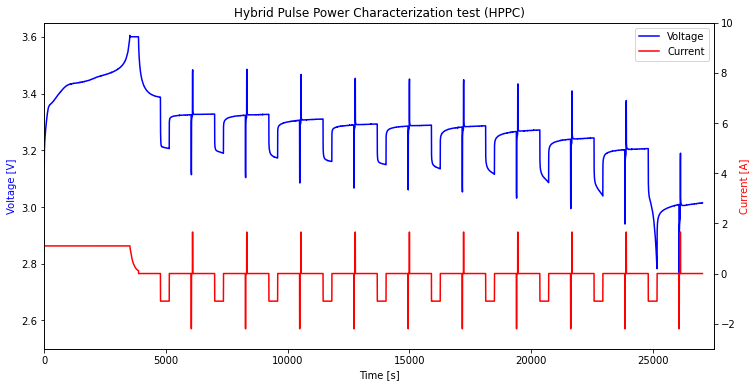

In [196]:
#Create plot
fig3 = plt.figure(figsize=[12, 6])

#Create axis
ax1 = plt.axes() 
#Plot voltage
l1 = ax1.plot(t, V, 'b', label='Voltage')  

#Create secondary y axis
ax2 = ax1.twinx()
#Plot current
l2 = ax2.plot(t, I, 'r', label='Current',)   

#Set labels
ax1.set_title('Hybrid Pulse Power Characterization test (HPPC)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]', color = 'b')
ax2.set_ylabel('Current [A]', color = 'r')
ax1.legend(handles=l1+l2)

#Set axis limits
ax1.set_xlim([0, 27500])
ax1.set_ylim([2.5, 3.65])
ax2.set_ylim([-3, 10])

plt.show()